In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
tdms_1150 = list()
tdms_1100 = list()
for file in os.listdir("../out/time-depth-models/"):
    if file.startswith("tdm_core_1150"):
        tdms_1150.append(file)
    elif file.startswith("tdm_core_1100"):
        tdms_1100.append(file)

In [3]:
tdms_1100

['tdm_core_1100_d18O_conventional.csv', 'tdm_core_1100_d18O_LR04stack_dtw.csv']

In [4]:
tdms_1150

['tdm_core_1150_d18O_bulk_split_1_core_1100_conventional_agemodel_out.csv',
 'tdm_core_1150_d18O_split_1_core_1100_conventional_agemodel_out.csv',
 'tdm_core_1150_aragonite_split_1_core_1100_conventional_agemodel_out.csv',
 'tdm_core_1150_aragonite_LR04stack_out.csv',
 'tdm_core_1150_d18O_bulk_split_1_LR04stack_out.csv',
 'tdm_core_1150_combined_core_1100_conventional_agemodel_out.csv',
 'tdm_core_1150_d18O_LR04stack_out.csv']

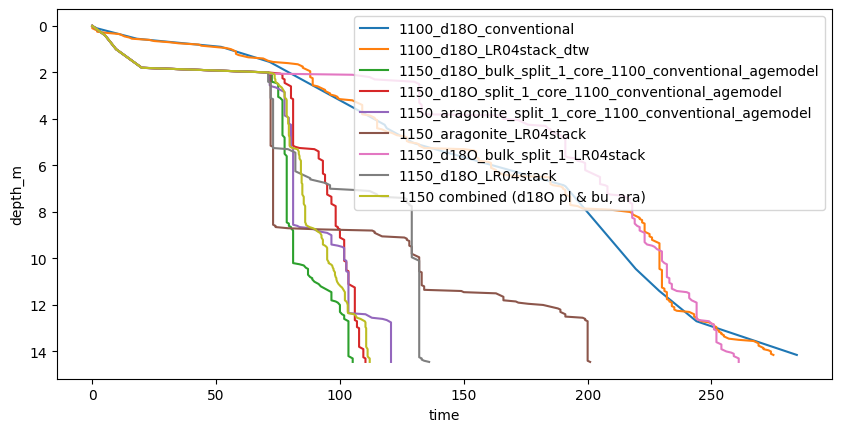

In [10]:
fig, ax = plt.subplots(1,1)
fig.set_figwidth(10)
for file in tdms_1100:
    label = file.split("tdm_core_1100_")[1]
    label = label.replace(".csv", "").replace("_out", "")
    df = pd.read_csv(f"../out/time-depth-models/{file}")
    sns.lineplot(ax=ax, x='time', y='depth_m', data=df, label=f"1100_{label}", estimator=None)
for file in tdms_1150:
    if not 'combined' in file:
        label = file.split("tdm_core_1150_")[1]
        label = label.replace(".csv", "").replace("_out", "")
        df = pd.read_csv(f"../out/time-depth-models/{file}")
        sns.lineplot(ax=ax, x='time', y='depth_m', data=df, label=f"1150_{label}", estimator=None)
df0 = pd.read_csv("../out/time-depth-models/tdm_core_1150_combined_core_1100_conventional_agemodel_out.csv")
sns.lineplot(ax=ax, x='time_combined', y='depth_m', data=df0, label="1150 combined (d18O pl & bu, ara)", estimator=None)
ax.invert_yaxis()

In [11]:
fig.savefig("../out/figures/time-depth-models.svg")
fig.savefig("../out/figures/time-depth-models.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
